In [1]:
import requests as req 
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
import time
import os
from urllib.request import urlretrieve

In [2]:
apart = pd.read_csv('data/Apart Deal.csv', low_memory=False)
apart

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700
...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500"
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700"
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300"
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500"


In [129]:
apart_copy = apart.copy()

In [4]:
# 건축년도 NaN값 채우기
apart_copy

const_list = []
const_list.append(['조촌동', '더샵디오션시티', '2021'])
const_list.append(['무실동', '더샵원주센트럴파크1단지', '2021'])
const_list.append(['중앙동', '힐스테이트속초센트럴', '2021'])
const_list.append(['가평읍 읍내리', '가평코아루', '2021'])
const_list.append(['송도동', '더샵송도프라임뷰25BL', '2022'])
const_list.append(['오산동', '동탄역유림노르웨이숲', '2022'])
const_list.append(['양촌읍 양곡리', 'My더퍼스트', '2022'])
const_list.append(['신암동', 'SG펠리체', '2021'])


for i in const_list :
    temp = apart_copy[(apart_copy['법정동']==i[0]) & (apart_copy['아파트']==i[1])].fillna(i[2]) 
    apart_copy[(apart_copy['법정동']==i[0]) & (apart_copy['아파트']==i[1])] = temp

In [130]:
a = pd.read_csv('data/시도컬럼.csv')

In [131]:
b = pd.read_csv('data/date_oranize_real_real.csv', low_memory=False)

In [132]:
apart_copy = pd.concat([apart_copy,a],axis = 1)

In [133]:
apart_copy = pd.concat([apart_copy, b], axis = 1)

In [134]:
apart_copy

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,Unnamed: 0,지역코드,시도,지역이름,Unnamed: 0,year,month,day
0,31110.00,학성동,5/30/2020 0:00,남운학성타운,379,135.58,8,1991.00,26700,0,31110,울산,중구,0,2020,5,30
1,31110.00,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.60,2,2006.00,35500,1,31110,울산,중구,1,2020,1,3
2,31110.00,남외동,1/3/2020 0:00,에일린의뜰,500,84.99,11,2007.00,36500,2,31110,울산,중구,2,2020,1,3
3,31110.00,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.71,8,2006.00,43000,3,31110,울산,중구,3,2020,1,3
4,31110.00,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.96,7,2007.00,38700,4,31110,울산,중구,4,2020,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002834,50130.00,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.13,6,2019.00,"19,500",5002834,50130,제주,서귀포시,5002834,2023,6,29
5002835,50130.00,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.87,2,1999.00,"21,700",5002835,50130,제주,서귀포시,5002835,2023,7,4
5002836,50130.00,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.31,1,2000.00,"9,300",5002836,50130,제주,서귀포시,5002836,2023,7,4
5002837,50130.00,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.88,2,2003.00,"25,500",5002837,50130,제주,서귀포시,5002837,2023,7,1


In [135]:
## 지번 NaN 값 채우기 

jibun_list = []
jibun_list.append(['남양읍 남양리', '동광뷰엘', '2235'])
jibun_list.append(['내곡동', '서초포레스타2단지', '384'])
jibun_list.append(['자곡동', '래미안포레', '687'])
jibun_list.append(['신원동', '힐스테이트 서초 젠트리스', '557'])
jibun_list.append(['나성동', '나릿재마을1단지', '259-1'])

for i in jibun_list :
    temp = apart_copy[(apart_copy['법정동']==i[0]) & (apart_copy['아파트']==i[1])].fillna(i[2])
    apart_copy[(apart_copy['법정동']==i[0]) & (apart_copy['아파트']==i[1])] = temp
    
apart_copy

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,Unnamed: 0,지역코드,시도,지역이름,Unnamed: 0,year,month,day
0,31110.00,학성동,5/30/2020 0:00,남운학성타운,379,135.58,8,1991.00,26700,0,31110,울산,중구,0,2020,5,30
1,31110.00,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.60,2,2006.00,35500,1,31110,울산,중구,1,2020,1,3
2,31110.00,남외동,1/3/2020 0:00,에일린의뜰,500,84.99,11,2007.00,36500,2,31110,울산,중구,2,2020,1,3
3,31110.00,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.71,8,2006.00,43000,3,31110,울산,중구,3,2020,1,3
4,31110.00,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.96,7,2007.00,38700,4,31110,울산,중구,4,2020,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002834,50130.00,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.13,6,2019.00,"19,500",5002834,50130,제주,서귀포시,5002834,2023,6,29
5002835,50130.00,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.87,2,1999.00,"21,700",5002835,50130,제주,서귀포시,5002835,2023,7,4
5002836,50130.00,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.31,1,2000.00,"9,300",5002836,50130,제주,서귀포시,5002836,2023,7,4
5002837,50130.00,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.88,2,2003.00,"25,500",5002837,50130,제주,서귀포시,5002837,2023,7,1


In [11]:
# '거래금액' 열을 수치형으로 변환
apart_copy['거래금액'] = pd.to_numeric(apart_copy['거래금액'], errors='coerce')

In [12]:
apart_copy['평수'] = apart_copy['전용면적'].astype(int)/3.3

In [13]:
# '평당가격' 컬럼 추가
apart_copy['평당가격'] = apart_copy['거래금액'] / apart_copy['평수']

# 결과 확인
print(apart_copy[['전용면적', '평수', '거래금액', '평당가격']])

             전용면적         평수     거래금액         평당가격
0        135.5800  40.909091  26700.0   652.666667
1        101.6000  30.606061  35500.0  1159.900990
2         84.9920  25.454545  36500.0  1433.928571
3        118.7060  35.757576  43000.0  1202.542373
4         84.9636  25.454545  38700.0  1520.357143
...           ...        ...      ...          ...
5002834   57.1300  17.272727      NaN          NaN
5002835   49.8700  14.848485      NaN          NaN
5002836   45.3100  13.636364      NaN          NaN
5002837   51.8800  15.454545      NaN          NaN
5002838   84.9875  25.454545      NaN          NaN

[5002839 rows x 4 columns]


In [14]:
print(apart_copy['시도'])

0          울산
1          울산
2          울산
3          울산
4          울산
           ..
5002834    제주
5002835    제주
5002836    제주
5002837    제주
5002838    제주
Name: 시도, Length: 5002839, dtype: object


In [15]:
# '지역'별로 그룹화하여 평균 계산
average_price_by_region = apart_copy.groupby('시도')['평당가격'].mean()
print(average_price_by_region)

시도
강원     657.934798
경기    1420.497956
경남     866.274756
경북     661.971031
광주     900.679200
대구    1176.365767
대전     988.871067
부산    1191.227367
서울    2656.512890
세종    1485.769336
울산    1046.722332
인천    1154.627608
전남     635.480189
전북     662.812117
제주    1234.943927
충남     769.887098
충북     717.191479
Name: 평당가격, dtype: float64


## 시도별 평당 금액

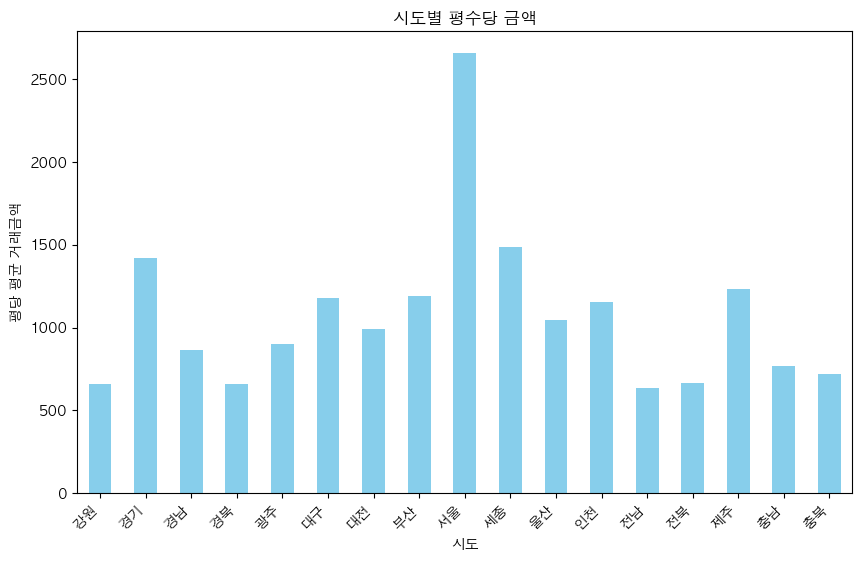

In [16]:
plt.figure(figsize=(10, 6))
average_price_by_region.plot(kind='bar', color='skyblue')
plt.title('시도별 평수당 금액')
plt.xlabel('시도')
plt.ylabel('평당 평균 거래금액')
plt.xticks(rotation=45, ha='right')
plt.show()

## 시도별 거래 건수

In [140]:
# '시도'별 거래 건수 계산
sido_deal_count = apart_copy['시도'].value_counts().reset_index()

# 열의 이름을 변경
sido_deal_count.columns = ['시도', '거래건수']

# 결과 확인
print(sido_deal_count)

    시도     거래건수
0   경기  1476889
1   서울   630323
2   경남   349606
3   부산   311280
4   인천   278194
5   경북   250709
6   충남   234094
7   대구   207311
8   전북   198497
9   충북   179268
10  강원   178764
11  전남   172569
12  대전   167482
13  광주   161206
14  울산   132804
15  세종    50308
16  제주    23535


In [18]:
# '시도'와 'year'를 기준으로 그룹화하여 '평당가격'의 평균 계산
average_price_by_region_year = apart_copy.groupby(['시도', 'year'])['평당가격'].mean().reset_index()

# Pivot을 사용하여 데이터프레임 재구성
df = average_price_by_region_year.pivot(index='year', columns='시도', values='평당가격')

# 결과 출력
print(df)

시도            강원           경기          경남          경북           광주  \
year                                                                 
2015  580.347313  1198.206177  832.478898  644.336516   774.680979   
2016  640.449390  1288.942713  827.371130  619.442549   826.108258   
2017  668.731604  1402.632495  818.383862  640.020097   880.309162   
2018  665.416016  1437.764269  803.741722  624.223131   931.550331   
2019  652.951990  1490.879406  846.367633  640.335170   961.290696   
2020  704.523070  1554.068556  953.510069  713.288396  1045.704822   
2021  747.788484  1614.215395  849.678671  690.345492  1008.464377   
2022   83.624116          NaN         NaN         NaN          NaN   
2023  138.750000          NaN         NaN   95.806452          NaN   

시도             대구           대전           부산           서울           세종  \
year                                                                    
2015  1065.312336   852.147075  1002.316804  2039.145386   920.544485   
2016  1073

In [19]:
# 연도별 '시도'의 '평당가격'의 평균 계산
average_price_year = apart_copy.groupby(['시도', 'year'])['평당가격'].mean()
print(average_price_year)

시도  year
강원  2015    580.347313
    2016    640.449390
    2017    668.731604
    2018    665.416016
    2019    652.951990
               ...    
충북  2019    709.642401
    2020    763.132190
    2021    771.024200
    2022     35.237288
    2023     35.423729
Name: 평당가격, Length: 153, dtype: float64


In [20]:
# 연도별 '시도'의 '평당가격'의 평균 계산
average_price_year = apart_copy.groupby(['시도', 'year'])['평당가격'].mean().reset_index()

# 'year' 컬럼을 index로 설정
average_price_year = average_price_year.set_index('year')

# 결과 출력
print(average_price_year)

      시도        평당가격
year                
2015  강원  580.347313
2016  강원  640.449390
2017  강원  668.731604
2018  강원  665.416016
2019  강원  652.951990
...   ..         ...
2019  충북  709.642401
2020  충북  763.132190
2021  충북  771.024200
2022  충북   35.237288
2023  충북   35.423729

[153 rows x 2 columns]


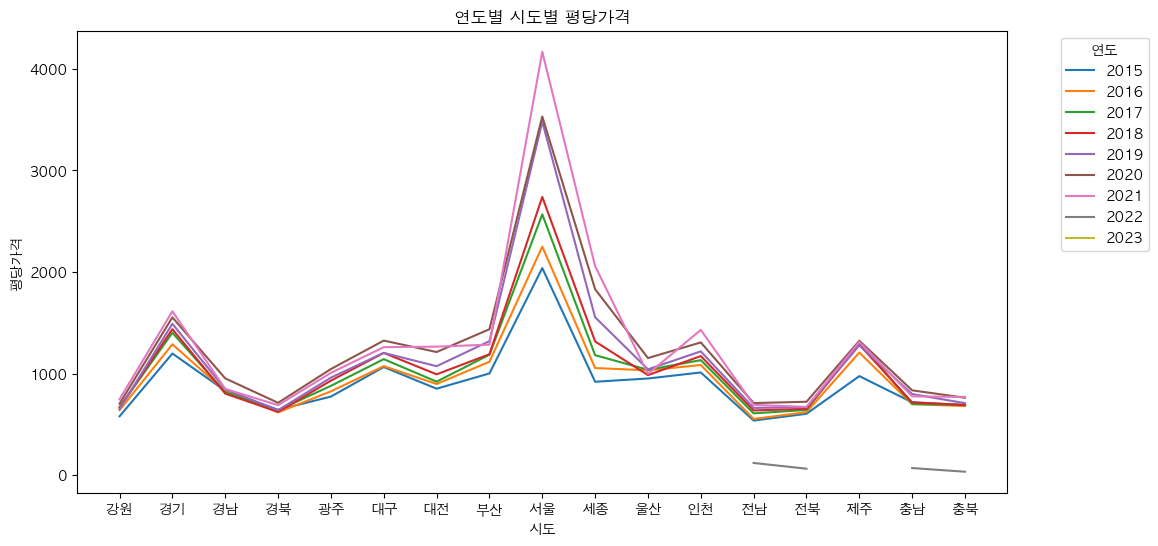

In [21]:

# 연도별 '시도'의 '평당가격'의 평균 계산
average_price_year = apart_copy.groupby(['year', '시도'])['평당가격'].mean().reset_index()

# 선 그래프 생성
plt.figure(figsize=(12, 6))
for year in average_price_year['year'].unique():
    data = average_price_year[average_price_year['year'] == year]
    plt.plot(data['시도'], data['평당가격'], label=str(year))

# 그래프 스타일과 레이블 설정
plt.title('연도별 시도별 평당가격')
plt.xlabel('시도')
plt.ylabel('평당가격')
plt.legend(title='연도', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [22]:
unique_years = apart_copy['year'].unique()
print(unique_years)

[2020 2019 2018 2017 2016 2015 2021 2022 2023]


In [23]:
len(apart_copy[apart_copy['year'] == 2022])

421446

In [24]:
len(apart_copy[apart_copy['year'] == 2023])

234947

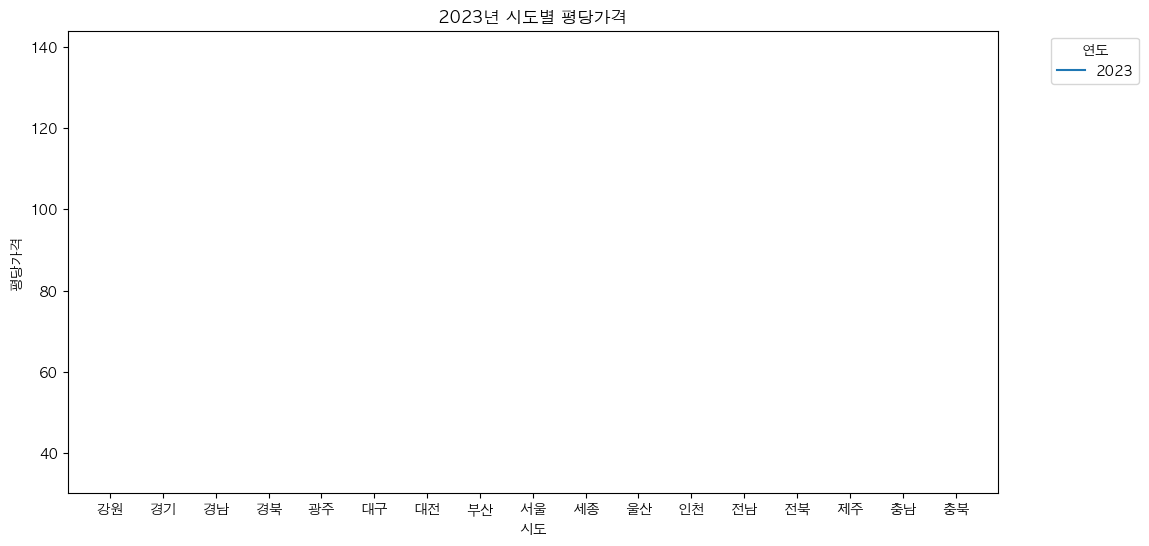

In [25]:
# 연도별 '시도'의 '평당가격'의 평균 계산
average_price_year = apart_copy.groupby(['year', '시도'])['평당가격'].mean().reset_index()

# 2023년 데이터만 필터링
average_price_2023 = average_price_year[average_price_year['year'] == 2023]

# 선 그래프 생성
plt.figure(figsize=(12, 6))
for year in average_price_2023['year'].unique():
    data = average_price_2023[average_price_2023['year'] == year]
    plt.plot(data['시도'], data['평당가격'], label=str(year))

# 그래프 스타일과 레이블 설정
plt.title('2023년 시도별 평당가격')
plt.xlabel('시도')
plt.ylabel('평당가격')
plt.legend(title='연도', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

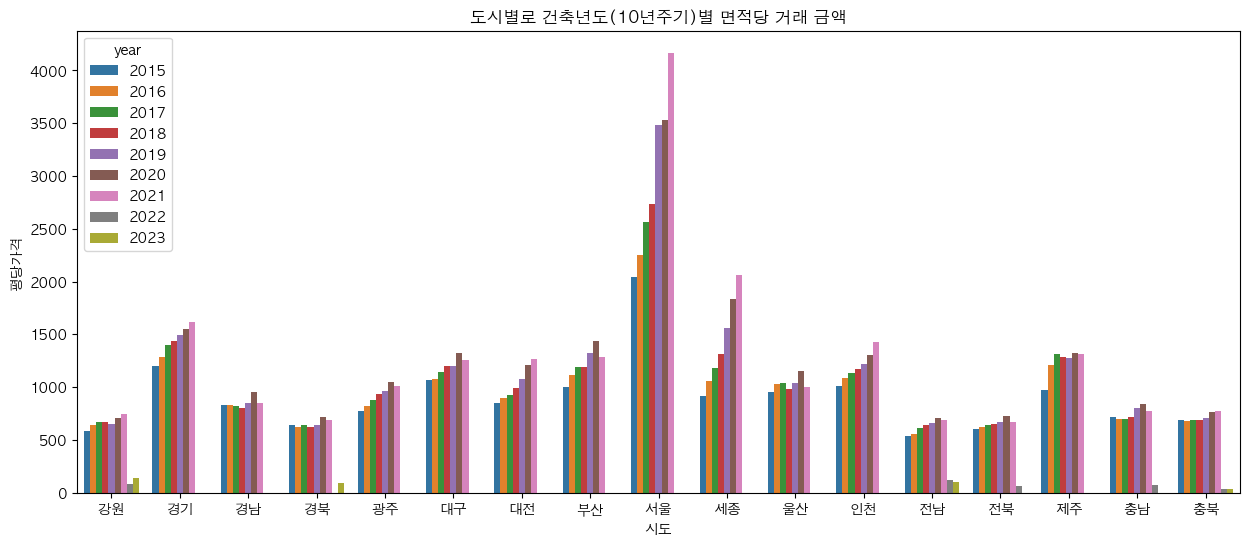

In [26]:
plt.figure(figsize = (15,6)) 

sns.barplot(data = average_price_year, x = '시도' , y='평당가격', hue ='year')

plt.ylabel('평당가격')

plt.title('도시별로 건축년도(10년주기)별 면적당 거래 금액')

plt.show()

In [27]:
average_price_year


,year,시도,평당가격
0,2015,강원,580.347313
1,2015,경기,1198.206177
2,2015,경남,832.478898
3,2015,경북,644.336516
4,2015,광주,774.680979
...,...,...,...
148,2023,전남,105.000000
149,2023,전북,NaN
150,2023,제주,NaN
151,2023,충남,NaN


In [28]:
apart_copy = apart_copy.drop('Unnamed: 0',axis = 1)

## ==================================================

In [11]:
# year, month, day 컬럼 csv
date = pd.read_csv('data/date_oranize_real_real.csv')
date

,Unnamed: 0,year,month,day
0,0,2020,5,30
1,1,2020,1,3
2,2,2020,1,3
3,3,2020,1,3
4,4,2020,1,4
...,...,...,...,...
5002834,5002834,2023,6,29
5002835,5002835,2023,7,4
5002836,5002836,2023,7,4
5002837,5002837,2023,7,1


In [5]:
date_2 = date.drop('Unnamed: 0',axis= 1)

In [6]:
apart_copy_2 = apart.copy()

In [7]:
# apart.csv + date_oranize_real_real.csv
apart_copy_date = pd.concat([apart_copy_2,date_2],axis=1)

In [8]:
apart_copy_date

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,year,month,day
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700,2020,5,30
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500,2020,1,3
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500,2020,1,3
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000,2020,1,3
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700,2020,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500",2023,6,29
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700",2023,7,4
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300",2023,7,4
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500",2023,7,1


In [9]:
apart_copy_date_pyung = apart_copy_date.copy()

In [10]:
apart_copy_date_pyung

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,year,month,day
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700,2020,5,30
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500,2020,1,3
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500,2020,1,3
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000,2020,1,3
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700,2020,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,"19,500",2023,6,29
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,"21,700",2023,7,4
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,"9,300",2023,7,4
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,"25,500",2023,7,1


# 연도별 시도별 평당 가격

In [12]:
# 평수 컬럼 생성

apart_copy_date_pyung['평수'] = round(apart_copy_date_pyung['전용면적'].astype(int)/3.3,1)

In [13]:
# 거래금액에서 , 제거

apart_copy_date_pyung['거래금액'] = apart_copy_date_pyung['거래금액'].astype(str)
apart_copy_date_pyung['거래금액'] = apart_copy_date_pyung['거래금액'].str.replace(',', '')
apart_copy_date_pyung['거래금액'] = apart_copy_date_pyung['거래금액'].astype(int)

In [14]:
# 평당가격 컬럼 생성

apart_copy_date_pyung['평당가격'] = round(apart_copy_date_pyung['거래금액']/apart_copy_date_pyung['평수'],1)

### 시도별 평당가격

In [ ]:
plt.figure(figsize=(10, 6))
apart_copy_date_pyung.plot(kind='bar', color='skyblue')
plt.title('시도별 평수당 금액')
plt.xlabel('시도')
plt.ylabel('평당 평균 거래금액')
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
# 시도 컬럼 생성

sido = pd.read_csv('data/시도컬럼.csv')

In [16]:
sido = sido.drop('Unnamed: 0',axis = 1)

In [17]:
sido = sido.drop('지역코드',axis = 1)

In [18]:
apart_copy_date_pyung_sido = pd.concat([apart_copy_date_pyung,sido],axis=1)

In [19]:
apart_copy_date_pyung_sido

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,year,month,day,평수,평당가격,시도,지역이름
0,31110.0,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991.0,26700,2020,5,30,40.9,652.8,울산,중구
1,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006.0,35500,2020,1,3,30.6,1160.1,울산,중구
2,31110.0,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007.0,36500,2020,1,3,25.5,1431.4,울산,중구
3,31110.0,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006.0,43000,2020,1,3,35.8,1201.1,울산,중구
4,31110.0,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007.0,38700,2020,1,4,25.5,1517.6,울산,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002834,50130.0,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.1300,6,2019.0,19500,2023,6,29,17.3,1127.2,제주,서귀포시
5002835,50130.0,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.8700,2,1999.0,21700,2023,7,4,14.8,1466.2,제주,서귀포시
5002836,50130.0,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.3100,1,2000.0,9300,2023,7,4,13.6,683.8,제주,서귀포시
5002837,50130.0,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.8800,2,2003.0,25500,2023,7,1,15.5,1645.2,제주,서귀포시


In [20]:
year_mean_pyung = apart_copy_date_pyung_sido.groupby(['year','시도'],as_index = False).agg(mean_pyung=('평당가격','mean'),연도별건수=('거래금액','count'))

In [21]:
year_mean_pyung['mean_pyung'] = round(year_mean_pyung['mean_pyung'],1)

In [22]:
year_mean_pyung

,year,시도,mean_pyung,연도별건수
0,2015,강원,579.9,21400
1,2015,경기,1197.4,200004
2,2015,경남,832.1,47299
3,2015,경북,644.0,26867
4,2015,광주,774.0,23601
...,...,...,...,...
148,2023,전남,774.9,8436
149,2023,전북,831.3,9516
150,2023,제주,1495.6,1097
151,2023,충남,909.6,13890


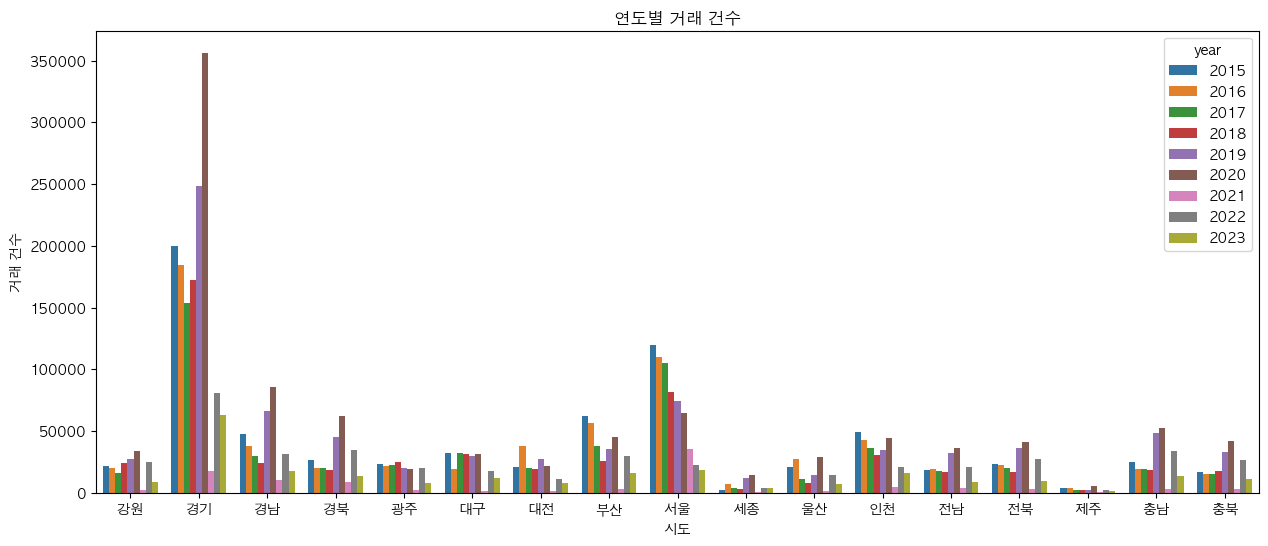

In [23]:
plt.figure(figsize = (15,6)) 

sns.barplot(data = year_mean_pyung, x = '시도' , y='연도별건수', hue ='year')

plt.ylabel('거래 건수')

plt.title('연도별 거래 건수')

plt.show()

In [ ]:
#인구수대비 거래건수
#2015~ 2023 년까지의 지역별 평균 인구수를 구한 다음
#2015~ 2023 년까지의 지역별 평균 거래 건수를 구하고 인구수 대비 거래건수 구해보기

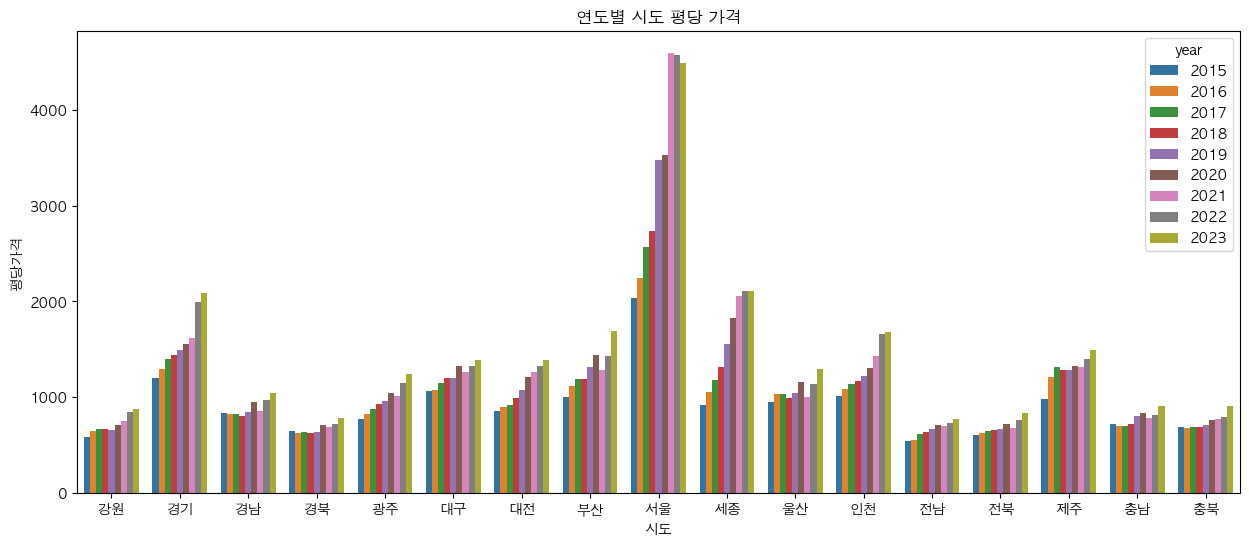

In [24]:
## 최종 그래프 생성

plt.figure(figsize = (15,6)) 

sns.barplot(data = year_mean_pyung, x = '시도' , y='mean_pyung', hue ='year')

plt.ylabel('평당가격')

plt.title('연도별 시도 평당 가격')

plt.show()

In [120]:
pop = pd.read_csv('data/2015~2022인구수.csv', encoding='euc-kr')
pop

,행정구역(시군구)별,2015,2015.1,2015.2,2016,2016.1,2016.2,2017,2017.1,2017.2,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명),...,여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명),총인구수 (명),남자인구수 (명),여자인구수 (명)
1,전국,51529338,25758186,25771152,51696216,25827594,25868622,51778544,25855919,25922625,...,25985045,51829023,25841029,25987994,51638809,25746684,25892125,51439038,25636951,25802087
2,서울특별시,10022181,4930943,5091238,9930616,4876789,5053827,9857426,4830206,5027220,...,4985048,9668465,4701723,4966742,9509458,4618040,4891418,9428372,4570048,4858324
3,부산광역시,3513777,1735570,1778207,3498529,1725607,1772922,3470653,1709508,1761145,...,1738424,3391946,1661000,1730946,3350380,1639044,1711336,3317812,1619915,1697897
4,대구광역시,2487829,1237291,1250538,2484557,1234169,1250388,2475231,1227814,1247417,...,1232745,2418346,1193109,1225237,2385412,1175632,1209780,2363691,1162865,1200826
5,인천광역시,2925815,1469869,1455946,2943069,1477671,1465398,2948542,1479597,1468945,...,1474777,2942828,1473943,1468885,2948375,1476373,1472002,2967314,1485175,1482139
6,광주광역시,1472199,729662,742537,1469214,728137,741077,1463770,725295,738475,...,735728,1450062,717348,732714,1441611,713015,728596,1431050,707299,723751
7,대전광역시,1518775,759778,758997,1514370,757289,757081,1502227,750969,751258,...,738263,1463882,730699,733183,1452251,724626,727625,1446072,721245,724827
8,울산광역시,1173534,604889,568645,1172304,603797,568507,1165132,599480,565652,...,558307,1136017,583708,552309,1121592,576217,545375,1110663,570368,540295
9,세종특별자치시,210884,105752,105132,243048,121505,121543,280100,139734,140366,...,170730,355831,177568,178263,371895,185678,186217,383591,191389,192202


In [121]:
# 필요한 열만 선택
year_pop = pop[['행정구역(시군구)별', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']].copy()

# '행정구역시군구별', '전국' 행 지워버리기
year_pop = year_pop.drop([0, 1])

# 인덱스를 리셋하여 새로운 인덱스를 할당
year_pop = year_pop.reset_index(drop=True)

year_pop

,행정구역(시군구)별,2015,2016,2017,2018,2019,2020,2021,2022
0,서울특별시,10022181,9930616,9857426,9765623,9729107,9668465,9509458,9428372
1,부산광역시,3513777,3498529,3470653,3441453,3413841,3391946,3350380,3317812
2,대구광역시,2487829,2484557,2475231,2461769,2438031,2418346,2385412,2363691
3,인천광역시,2925815,2943069,2948542,2954642,2957026,2942828,2948375,2967314
4,광주광역시,1472199,1469214,1463770,1459336,1456468,1450062,1441611,1431050
5,대전광역시,1518775,1514370,1502227,1489936,1474870,1463882,1452251,1446072
6,울산광역시,1173534,1172304,1165132,1155623,1148019,1136017,1121592,1110663
7,세종특별자치시,210884,243048,280100,314126,340575,355831,371895,383591
8,경기도,12522606,12716780,12873895,13077153,13239666,13427014,13565450,13589432
9,강원특별자치도,1549507,1550806,1550142,1543052,1541502,1542840,1538492,1536498


In [122]:
# 각 연도의 값을 1,000으로 나누어서 소수점 둘째 자리까지 표시
for year in range(2015, 2023):
    year_pop[str(year)] = pd.to_numeric(year_pop[str(year)], errors='coerce') / 1000

# '2015'부터 '2022'까지의 값을 더함
year_pop['평균인구수'] = year_pop[['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']].sum(axis=1)

# '행정구역(시군구)별'로 그룹화하고 각 그룹에 대한 평균값을 계산
average_pop = year_pop.groupby('행정구역(시군구)별')['평균인구수'].mean().reset_index()

# 출력 형식 설정: 숫자 표시 자릿수를 2로 설정
pd.set_option('display.float_format', '{:.2f}'.format)

# 결과 확인
print(average_pop)

   행정구역(시군구)별     평균인구수
0     강원특별자치도  12352.84
1         경기도 105012.00
2        경상남도  26790.41
3        경상북도  21304.12
4       광주광역시  11643.71
5       대구광역시  19514.87
6       대전광역시  11862.38
7       부산광역시  27398.39
8       서울특별시  77911.25
9     세종특별자치시   2500.05
10      울산광역시   9182.88
11      인천광역시  23587.61
12       전라남도  14963.10
13       전라북도  14605.42
14    제주특별자치도   5290.81
15       충청남도  16904.46
16       충청북도  12762.59


In [123]:
# '행정구역(시군구)별' 열의 이름을 변경
average_pop.rename(columns={'행정구역(시군구)별': '시도'}, inplace=True)

# 시군구 이름을 원하는대로 변경
name_mapping = {
    '서울특별시': '서울',
    '부산광역시': '부산',
    '대구광역시': '대구',
    '강원특별자치도': '강원',
    '경기도': '경기',
    '경상남도': '경남',
    '경상북도': '경북',
    '광주광역시': '광주',
    '대전광역시': '대전',
    '울산광역시': '울산',
    '세종특별자치시': '세종',
    '인천광역시': '인천',
    '전라남도': '전남',
    '전라북도': '전북',
    '제주특별자치도': '제주',
    '충청남도': '충남',
    '충청북도': '충북',
}

average_pop['시도'] = average_pop['시도'].map(name_mapping)

# 변경된 데이터 확인
print(average_pop)

    시도     평균인구수
0   강원  12352.84
1   경기 105012.00
2   경남  26790.41
3   경북  21304.12
4   광주  11643.71
5   대구  19514.87
6   대전  11862.38
7   부산  27398.39
8   서울  77911.25
9   세종   2500.05
10  울산   9182.88
11  인천  23587.61
12  전남  14963.10
13  전북  14605.42
14  제주   5290.81
15  충남  16904.46
16  충북  12762.59


<Figure size 1000x600 with 0 Axes>

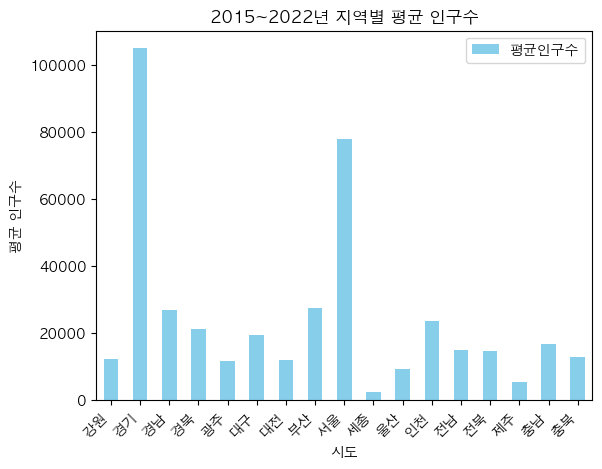

In [127]:
plt.figure(figsize=(10, 6))
average_pop.plot(kind='bar', color='skyblue', x='시도', y='평균인구수')
plt.title('2015~2022년 시도별 평균 인구수')
plt.xlabel('시도')
plt.ylabel('평균 인구수')
plt.xticks(rotation=45, ha='right')
plt.show()

In [125]:
# '시도' 열을 기준으로 데이터 병합
apart_copy_date_pyung_sido_average = pd.merge(apart_copy_date_pyung_sido, average_pop[['시도', '평균인구수']], on='시도', how='left')

# 결과 확인
apart_copy_date_pyung_sido_average

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,year,month,day,평수,평당가격,시도,지역이름,평균인구수
0,31110.00,학성동,5/30/2020 0:00,남운학성타운,379,135.58,8,1991.00,26700,2020,5,30,40.90,652.80,울산,중구,9182.88
1,31110.00,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.60,2,2006.00,35500,2020,1,3,30.60,1160.10,울산,중구,9182.88
2,31110.00,남외동,1/3/2020 0:00,에일린의뜰,500,84.99,11,2007.00,36500,2020,1,3,25.50,1431.40,울산,중구,9182.88
3,31110.00,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.71,8,2006.00,43000,2020,1,3,35.80,1201.10,울산,중구,9182.88
4,31110.00,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.96,7,2007.00,38700,2020,1,4,25.50,1517.60,울산,중구,9182.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002834,50130.00,대정읍 하모리,2023-06-29 00:00:00,더그라벨아파트,1221-1,57.13,6,2019.00,19500,2023,6,29,17.30,1127.20,제주,서귀포시,5290.81
5002835,50130.00,동홍동,2023-07-04 00:00:00,주공5차(동홍5차),1674,49.87,2,1999.00,21700,2023,7,4,14.80,1466.20,제주,서귀포시,5290.81
5002836,50130.00,서홍동,2023-07-04 00:00:00,서홍반석타운,2004-1,45.31,1,2000.00,9300,2023,7,4,13.60,683.80,제주,서귀포시,5290.81
5002837,50130.00,중문동,2023-07-01 00:00:00,중문푸른마을,1789,51.88,2,2003.00,25500,2023,7,1,15.50,1645.20,제주,서귀포시,5290.81


In [147]:
# '시도'를 기준으로 데이터 병합
average_pop_count = pd.merge(average_pop, sido_deal_count, on='시도', how='left')

# '평균인구수' 대비 '거래건수' 계산
average_pop_count['평균인구수대비거래비율'] = average_pop_count['거래건수'] / average_pop_count['평균인구수']

# 결과 확인
print(average_pop_count[['시도', '평균인구수', '거래건수', '평균인구수대비거래비율']])

    시도     평균인구수     거래건수  평균인구수대비거래비율
0   강원  12352.84   178764        14.47
1   경기 105012.00  1476889        14.06
2   경남  26790.41   349606        13.05
3   경북  21304.12   250709        11.77
4   광주  11643.71   161206        13.84
5   대구  19514.87   207311        10.62
6   대전  11862.38   167482        14.12
7   부산  27398.39   311280        11.36
8   서울  77911.25   630323         8.09
9   세종   2500.05    50308        20.12
10  울산   9182.88   132804        14.46
11  인천  23587.61   278194        11.79
12  전남  14963.10   172569        11.53
13  전북  14605.42   198497        13.59
14  제주   5290.81    23535         4.45
15  충남  16904.46   234094        13.85
16  충북  12762.59   179268        14.05


<Figure size 1000x600 with 0 Axes>

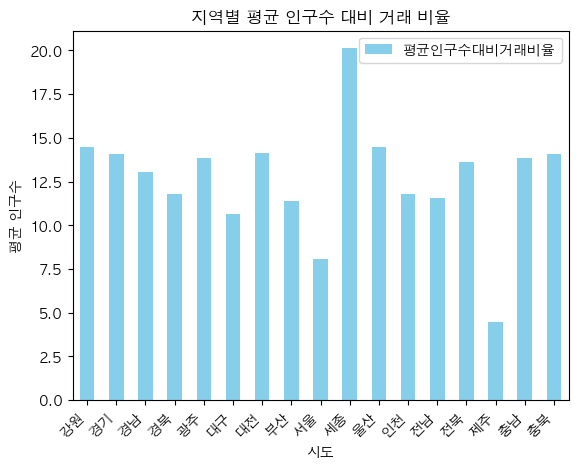

In [150]:
plt.figure(figsize=(10, 6))
average_pop_count.plot(kind='bar', color='skyblue', x='시도', y='평균인구수대비거래비율')
plt.title('지역별 평균 인구수 대비 거래 비율')
plt.xlabel('시도')
plt.ylabel('평균 인구수')
plt.xticks(rotation=45, ha='right')
plt.show()